## Question 1: 

### (a) gradient and Hessian of $f(x)$

$$ f(x) = \sum_{i=1}^n \ln(1 + e^{\langle a_{i},x \rangle}) - b_{i} \langle a_{i},x \rangle 
$$ <br>

$$ \nabla f(x) = \sum_{i=1}^n \frac{a_{i} e^{\langle a_{i},x \rangle}}{1+e^{\langle a_{i},x \rangle}} - a_{i}b_{i} 
$$ <br>

$$ 
\begin{align}
\nabla^2 f(x) & = \sum_{i=1}^n \left( \frac{a_{i} e^{\langle a_{i},x \rangle}(1 + e^{\langle a_{i},x \rangle}) - a_{i} e^{2 \langle a_{i},x \rangle}} {(1+e^{\langle a_{i},x \rangle})^2}\right) a_{i}^T \\
& = \sum_{i=1}^n a_{i} \frac{e^{\langle a_{i},x \rangle}}{(1+e^{\langle a_{i},x \rangle})^2} a_{i}^T 
\end{align}
$$ <br>

### (b) prove $f(x)$ is convex
We have that $f:C\to \mathbb{R}$ is twice differentiable and $x \in \mathbb{R}^d$.
Thus, if $\nabla^2 f(x) \succeq 0$, then $f(x)$ is convex. <br>
Recall we have:
$$ \nabla^2 f(x) = \sum_{i=1}^n a_{i} \frac{e^{\langle a_{i},x \rangle}}{(1+e^{\langle a_{i},x \rangle})^2} a_{i}^T $$ <br>
So we can simply define the Hessian as $ H = A^T D A $. 
Since, $ e^t \in \left(0,\infty \right) $ for any $t$, we have $ \frac{e^t}{1+e^t} > 0 $. <br>
Thus, the Hessian is positive semidefinite and it that proves $f(x)$ is convex. <br>

### (c) logisticFun

In [1]:
from derivativeTest import derivativeTest
import numpy as np
import numpy.random as rand
from numpy.linalg import norm

In [2]:
def logisticFun(x,A,b):
    
    n,d = np.shape(A)
    f = 0
    g = 0
    H = 0
    
    for i in range(n):
        ai = A[i].reshape(1,-1)
        bi = b[i] # scalar
        t = np.dot(ai,x)
        ait = ai.T # dx1
        
        # apply log-sum-exp trick
        m = max(0, t) # scalar
        S1 = np.divide((np.exp(-m) + np.exp(t-m)), np.exp(-m)) # dx1
        S2 = np.divide(np.exp(t-m), (np.exp(-m) + np.exp(t-m))) # dx1
        
        # outputs
        f += np.log(S1) - bi * t #
        g += ait * S2 - ait * bi # dx1
        H += ait * (S2*(1-S2)) * ai # dxd
    
    return f, g, H

### (d) test logisticFun

First Order Error is 3.52e-01;   Second Order Error is 3.67e-01
First Order Error is 1.23e-01;   Second Order Error is 5.71e-02
First Order Error is 3.70e-02;   Second Order Error is 7.88e-03
First Order Error is 1.02e-02;   Second Order Error is 1.02e-03
First Order Error is 2.68e-03;   Second Order Error is 1.29e-04
First Order Error is 6.86e-04;   Second Order Error is 1.63e-05
First Order Error is 1.73e-04;   Second Order Error is 2.04e-06
First Order Error is 4.36e-05;   Second Order Error is 2.55e-07
First Order Error is 1.09e-05;   Second Order Error is 3.19e-08
First Order Error is 2.74e-06;   Second Order Error is 3.99e-09
First Order Error is 6.85e-07;   Second Order Error is 4.98e-10
First Order Error is 1.71e-07;   Second Order Error is 6.23e-11
First Order Error is 4.28e-08;   Second Order Error is 7.79e-12
First Order Error is 1.07e-08;   Second Order Error is 9.74e-13
First Order Error is 2.68e-09;   Second Order Error is 1.23e-13
First Order Error is 6.69e-10;   Second 

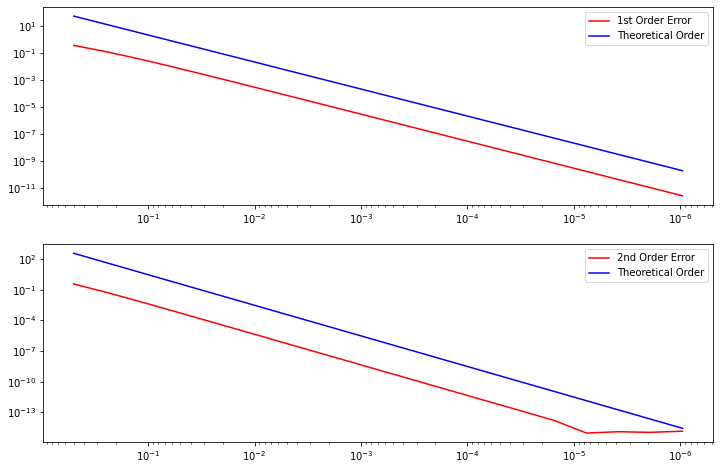

In [3]:
n,d = 1000, 50
A = rand.rand(n,d)
I = np.eye(2, 1)
ind = rand.randint(2, size = n)
b = I[ind , :]
fun = lambda x: logisticFun (x,A,b)
derivativeTest(fun, rand.randn(d,1))

### (e) add hessian-vector product function handle

In [4]:
def logisticFun(x,A,b): 
    
    n,d = np.shape(A)
    f = 0
    g = 0
    H = 0
    
    for i in range(n):
        ai = A[i].reshape(1,-1)
        bi = b[i] # scalar
        t = np.dot(ai,x)
        ait = ai.T # dx1
        
        # apply log-sum-exp trick
        m = max(0, t) # scalar
        S1 = np.divide((np.exp(-m) + np.exp(t-m)), np.exp(-m)) # dx1
        S2 = np.divide(np.exp(t-m), (np.exp(-m) + np.exp(t-m))) # dx1
        
        # outputs
        f += np.log(S1) - bi * t 
        g += ait * S2 - ait * bi # dx1
        
    H =  lambda v: handle(x,A,b,v)
    
    return f, g, H


# return Hessian-vector product
def handle(x,A,b,v):
    
    n,d = np.shape(A)
    Hv = 0
    for i in range(n):
        ai = A[i].reshape(1,-1)
        bi = b[i] # scalar
        t = np.dot(ai,x)
        ait = ai.T # dx1
        
        # apply log-sum-exp trick
        m = max(0, t) # scalar
        S1 = np.divide((np.exp(-m) + np.exp(t-m)), np.exp(-m)) # dx1
        S2 = np.divide(np.exp(t-m), (np.exp(-m) + np.exp(t-m))) # dx1
        Hv += np.dot(ai,v) * (S2*(1-S2)) * ait
        
    return Hv

### (f) test logiticFun with function handle

First Order Error is 1.57e-01;   Second Order Error is 4.27e-02
First Order Error is 3.50e-02;   Second Order Error is 6.31e-03
First Order Error is 7.99e-03;   Second Order Error is 8.22e-04
First Order Error is 1.90e-03;   Second Order Error is 1.03e-04
First Order Error is 4.61e-04;   Second Order Error is 1.29e-05
First Order Error is 1.14e-04;   Second Order Error is 1.60e-06
First Order Error is 2.82e-05;   Second Order Error is 2.00e-07
First Order Error is 7.03e-06;   Second Order Error is 2.50e-08
First Order Error is 1.75e-06;   Second Order Error is 3.12e-09
First Order Error is 4.38e-07;   Second Order Error is 3.91e-10
First Order Error is 1.09e-07;   Second Order Error is 4.88e-11
First Order Error is 2.74e-08;   Second Order Error is 6.10e-12
First Order Error is 6.84e-09;   Second Order Error is 7.61e-13
First Order Error is 1.71e-09;   Second Order Error is 9.62e-14
First Order Error is 4.27e-10;   Second Order Error is 1.14e-14
First Order Error is 1.07e-10;   Second 

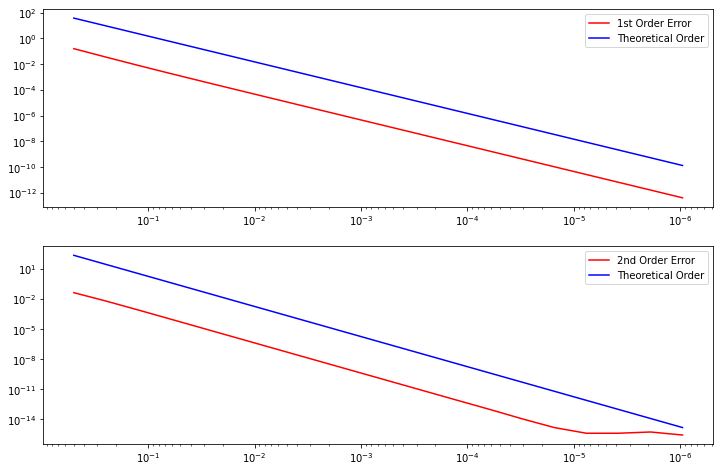

In [5]:
n,d = 1000, 50
A = rand.rand(n,d)
I = np.eye(2, 1)
ind = rand.randint(2, size = n)
b = I[ind , :]
v = rand.randn(d,1) # add v vector
fun = lambda x: logisticFun (x,A,b)
derivativeTest(fun, rand.randn(d,1))

## Question 2:

### (a) prove $f(X)$ is strongly convex

$$ f(x) = \sum_{i=1}^n (\ln(1 + e^{\langle a_{i},x \rangle}) - b_{i} \langle a_{i},x \rangle ) + \frac{\lambda}{2}\| x \| ^2
$$ <br>

$$ \nabla f(x) = \sum_{i=1}^n \frac{a_{i} e^{\langle a_{i},x \rangle}}{1+e^{\langle a_{i},x \rangle}} - a_{i}b_{i} + \lambda x
$$ <br>

$$ 
\begin{align}
\nabla^2 f(x) & = \sum_{i=1}^n \left( \frac{a_{i} e^{\langle a_{i},x \rangle}(1 + e^{\langle a_{i},x \rangle}) - a_{i} e^{2 \langle a_{i},x \rangle}} {(1+e^{\langle a_{i},x \rangle})^2}\right) a_{i}^T + \lambda \\
& = \sum_{i=1}^n a_{i} \frac{e^{\langle a_{i},x \rangle}}{(1+e^{\langle a_{i},x \rangle})^2} a_{i}^T + \lambda
\end{align}
$$ <br>

We have that $f:C\to \mathbb{R}$ is twice differentiable and $x \in \mathbb{R}^d$.
Thus, if $\nabla^2 f(x) \succ 0$, then $f(x)$ is strictly convex. <br>
From Question 1, we know the sum part of the current Hessian is positive semi-definite. <br>
Since $\lambda > 0$, the Hessian is positive-definite and it that proves $f(x)$ is strongly convex. <br>

### (b)
$$ \lVert \nabla^2 f(x) \rVert = \lVert \lim_{y \to x}\frac{\nabla f(x) - \nabla f(y)}{x-y} \rVert \leq L_g $$ \
$$ \lVert \nabla f(x) - \nabla f(y) \rVert \leq L_g \lVert x - y \rVert $$\
Therefore, $\nabla f(x)$ is $L_g$-Lipschitz continuous. <br>
Simply define $\nabla^2 f(x) = A^TDA + \lambda I$, and we have 

$$
\begin{align}
D &= \frac{e^{\langle a_{i},x \rangle}}{(1+e^{\langle a_{i},x \rangle})^2} \\
&= \frac{e^{\langle a_{i},x \rangle}}{1+e^{\langle a_{i},x \rangle}} \frac{1}{1+e^{\langle a_{i},x \rangle}}
\end{align}
$$
Since $e^t \leq 1$, we have $D \leq \frac{1}{4}$, which means $ L_g \leq D \lVert A \rVert ^2 + \lambda $. \
Hence it proves that $ L_g \leq \frac{1}{4} \lVert A \rVert ^2 + \lambda $. 


### (c) add regularization term

In [6]:
def logisticFun(x,A,b,lamb): 
    
    n,d = np.shape(A)
    f = 0
    g = 0
    H = 0
    
    for i in range(n):
        ai = A[i].reshape(1,-1) # 1xd
        bi = b[i] # scalar
        ait = ai.T # dx1
        t = np.dot(ai,x)
                  
        # apply log-sum-exp trick
        m = max(0, t) # scalar
        S1 = m + np.log(np.exp(-m) + np.exp(t-m))
        S2 = np.exp(t-m)/(np.exp(-m) + np.exp(t-m))
        
        # outputs
        f += S1 - bi * t + (lamb/2) * (norm(x))**2
        g += ait * S2 - ait * bi + lamb*x # dx1
        
    H =  lambda v: handle(x,A,b,lamb,v)
    
    return f, g, H


# return Hessian-vector product
def handle(x,A,b,lamb,v):
    
    n,d = np.shape(A)
    v = v.reshape(len(v), 1)
    Hv = 0
    for i in range(n):
        ai = A[i].reshape(1,-1) # 1xd
        bi = b[i] # scalar
        ait = ai.T # dx1
        t = np.dot(ai,x) # scalar
        
        # apply log-sum-exp trick
        m = max(0, t) # scalar
        S2 = np.exp(t-m)/(np.exp(-m) + np.exp(t-m))
        Hv += np.dot(ai,v) * (S2*(1-S2)) * ait + lamb*v
        
    return Hv

First Order Error is 1.16e+00;   Second Order Error is 7.27e-03
First Order Error is 2.90e-01;   Second Order Error is 9.89e-04
First Order Error is 7.26e-02;   Second Order Error is 1.22e-04
First Order Error is 1.82e-02;   Second Order Error is 1.48e-05
First Order Error is 4.55e-03;   Second Order Error is 1.82e-06
First Order Error is 1.14e-03;   Second Order Error is 2.25e-07
First Order Error is 2.84e-04;   Second Order Error is 2.79e-08
First Order Error is 7.11e-05;   Second Order Error is 3.48e-09
First Order Error is 1.78e-05;   Second Order Error is 4.35e-10
First Order Error is 4.44e-06;   Second Order Error is 5.43e-11
First Order Error is 1.11e-06;   Second Order Error is 6.78e-12
First Order Error is 2.78e-07;   Second Order Error is 8.49e-13
First Order Error is 6.94e-08;   Second Order Error is 1.06e-13
First Order Error is 1.73e-08;   Second Order Error is 1.29e-14
First Order Error is 4.34e-09;   Second Order Error is 3.19e-15
First Order Error is 1.08e-09;   Second 

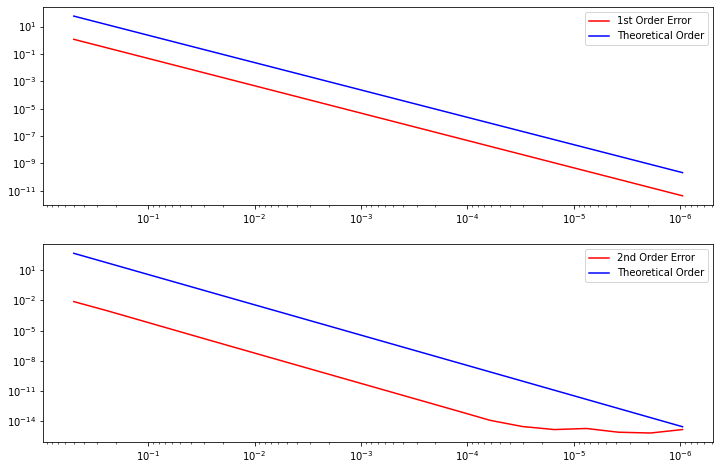

In [7]:
n,d = 1000, 50
A = rand.rand(n,d)
I = np.eye(2, 1)
ind = rand.randint(2, size = n)
b = I[ind , :]
v = rand.randn(d,1) # add v vector
lamb = 1
x = rand.randn(d,1)
fun = lambda x: logisticFun(x,A,b,lamb)
derivativeTest(fun, rand.randn(d,1))

I would like to use the provided softMaxFun in the following tasks for better performance, so I write a seperate regFun for it. 

In [8]:
from softMaxFun import softMaxFun
regFun = lambda x: [(lamb/2)*(norm(x))**2, lamb*x, lambda v: lamb*v]

### (d) three optimization methods

Armijo Linesearch for Gradient Descent and Newton-GC:

In [9]:
def armijo_linesearch(p,x,f,g,alpha0,beta1):
    alpha = alpha0
    k = 1
    while True:
        y = x + alpha * p
        fy = softMaxFun(y,A1,b1,arg='f',regFun=regFun)
        cal_fy = f + alpha * beta1 * np.dot(g.T,p)       
        if fy <= cal_fy:
            break
        elif k > 1000:
            break
        else: 
            alpha = alpha/2
            k += 1
    return alpha

#### 1. Gradient Descent

In [26]:
def Gradient_Descent(x0,A1,b1,tol,lamb,A2,b2):
    Lg = (norm(A1)**2)/4 + lamb
    alpha0 = 10/Lg
    x = x0
    k = 0
    start_time = time.time()
    while True:
        f,g = softMaxFun(x,A1,b1, arg='fg',regFun=regFun)
        object1.append(f) # objective value
        gradient1.append(norm(g)) # norm of gradient
        la = label(A2,x) # assign labels to A_test with current x
        acc = compare(la,b2) # compare the predictions with actual labels
        accuracy1.append(acc) # accuracy of predictions 
        p = - g
        alpha = armijo_linesearch(p,x,f,g,alpha0,beta1) # armijo line-search
        x = x + alpha * p 
        time1.append(time.time() - start_time)
        if norm(g) <= tol:
            break
        elif k > 1000:
            break
        else:
            k += 1
    return x    

#### 2. Newton-CG

In [27]:
import scipy.sparse.linalg as spsla
def Newton_CG(x0,A1,b1,tol,alpha0,A2,b2):
    x = x0
    k = 0
    start_time = time.time()
    while True:
        f,g,H = softMaxFun(x,A1,b1, arg='fgH',regFun=regFun)
        object2.append(f) # objective value
        gradient2.append(norm(g)) # norm of gradient
        la = label(A2,x) # assign labels to A_test with current x
        acc = compare(la,b2) # compare the predictions with actual labels
        accuracy2.append(acc) # accuracy of predictions 
        p, info = spsla.cg(H, -g, tol=1e-2, maxiter=100) # use CG to find p
        p = p.reshape(len(p),1)
        alpha = armijo_linesearch(p,x,f,g,alpha0,beta1) # armijo line-search
        x = x + alpha * p
        time2.append(time.time() - start_time)
        if norm(g) <= tol:
            break
        elif k > 1000:
            break
        else:
            k += 1
    return x

#### 3. L-BFGS

In [28]:
def LBFGS_direction(g,s_list,y_list,m,H0,d):
    q = g
    k = len(s_list)
    alpha_list = []
    if k <= (m):
        index2 = list(range(k)) # j = 0,1,...,k-1
        index1 = index2[::-1] # i = k-1,...,1,0
    else:
        index2 = list(range(k))[-m:] #  j = k-m, ..., k-1
        index1 = index2[::-1] # k-1,...,k-m
    for i in index1:
        si = s_list[i]
        si = si.reshape(d,1) 
        yi = y_list[i]
        yi = yi.reshape(d,1) 
        alpha_i = np.dot(si.T,q)/ np.dot(si.T,yi)
        alpha_list.append(alpha_i)
        q = q - alpha_i * yi 
    r = H0 @ q
    alpha_list = alpha_list[::-1] # alpha: k-m, ..., k-1
    for j in index2:
        count = 0
        sj = s_list[j].reshape(d,1) 
        yj = y_list[j].reshape(d,1) 
        beta = np.dot(yj.T,r) / np.dot(sj.T,yj)
        alpha_j = alpha_list[count]
        count += 1
        r = r + (alpha_j - beta)*sj
    return -r

In [29]:
from lineSearchWolfeStrong import lineSearchWolfeStrong

def LBFGS(x0,m,A1,b1,tol,A2,b2):
    n,d = np.shape(A1)
    s_list = []
    y_list = []
    x = x0
    k = 0
    start_time = time.time()
    while True: 
        fun = lambda x: softMaxFun(x,A1,b1, arg='fg',regFun=regFun)
        f,g = softMaxFun(x,A1,b1, arg='fg',regFun=regFun)
        object3.append(f)# objective value
        gradient3.append(norm(g)) # gradient norm
        la = label(A2,x) # assign labels to A_test with current x
        acc = compare(la,b2) # compare the predictions with actual labels
        accuracy3.append(acc) # accuracy of predictions 
        
        if k == 0:
            p = -g # initial direction
        else:
            H0 = (np.dot(s.T,y)/np.dot(y.T,y))* np.identity(d)
            p = LBFGS_direction(g,s_list,y_list,m,H0,d)
            
        alpha,ite = lineSearchWolfeStrong(fun, x, p, alpha0 = 1, c1=1e-4, c2=0.9, linesearchMaxItrs=200)
        x_new = x + alpha * p
        s = x_new - x # dx1
        s_list.append(s.reshape(-1))
        g2 = softMaxFun(x_new,A1,b1, arg='g',regFun=regFun)
        y = g2 - g # dx1
        y_list.append(y.reshape(-1))
        x = x_new
        time3.append(time.time() - start_time)
        if norm(g) < tol:
            break
        elif k > 1000:
            break
        else:
            k += 1
    return x             

### (e) classification function

In [14]:
def label(A2,x):
    y_label = []
    n2, d2 = np.shape(A2)
    for i in range(n2):
        ai = A2[i].reshape(1,-1)
        t = np.dot(ai,x)
        p1 = 1/(1 + np.exp(t))
        p2 = 1/(1 + np.exp(-t))
        if p1 > p2:
            y = 0
        else:
            y = 1
        y_label.append(y)
    return y_label

### (f) apply the three methods to spam dataset

In [15]:
import time
import matplotlib.pyplot as plt
from loadData import loadData
A_train, b_train, A_test, b_test = loadData()
b_test = b_test[:, 0]

Compare the predictions with actual labels: 

In [16]:
def compare(y,b2):
    b2 = b2.tolist()
    k = 0
    for i in range(len(b2)):
        if y[i] == b2[i]:
            k += 1
    return k/len(b2)

Set parameters and implement the methods: 

In [30]:
A1 = A_train
b1 = b_train
A2 = A_test
b2 = b_test
n,d = np.shape(A1)
x0 = np.zeros((d,1))
lamb = 1
tol = 1e-4
alpha0 = 1
beta1 = 1e-4
m = 20

# Gradient Descent
object1 = []
gradient1 = []
accuracy1 = []
time1 = []
xk = Gradient_Descent(x0,A1,b1,tol,lamb,A2,b2)

# Newton-CG
object2 = []
gradient2 = []
accuracy2 = []
time2 = []
xk = Newton_CG(x0,A1,b1,tol,alpha0,A2,b2)

# L-BFGS
object3 = []
gradient3 = []
accuracy3 = []
time3 = []
xk = LBFGS(x0,m,A1,b1,tol,A2,b2)

C:\Users\ariaq\OneDrive\MATH3204\Assignments\Assignment 4\Jupyter Files\lineSearchWolfeStrong.py:88: RuntimeWarning: invalid value encountered in sqrt
  d2 = np.sign(x2 - x1)*np.sqrt(d1**2 - g1*g2)
C:\Users\ariaq\OneDrive\MATH3204\Assignments\Assignment 4\Jupyter Files\lineSearchWolfeStrong.py:98: RuntimeWarning: invalid value encountered in greater_equal
  if x >= a and x <= b:
C:\Users\ariaq\OneDrive\MATH3204\Assignments\Assignment 4\Jupyter Files\lineSearchWolfeStrong.py:83: RuntimeWarning: invalid value encountered in true_divide
  d1 = g1 + g2 - 3*(f1 - f2)/(x1 - x2)
<ipython-input-29-dd5796d711ce>:22: RuntimeWarning: invalid value encountered in true_divide
  H0 = (np.dot(s.T,y)/np.dot(y.T,y))* np.identity(d)
<ipython-input-28-06080b6a7627>:16: RuntimeWarning: invalid value encountered in true_divide
  alpha_i = np.dot(si.T,q)/ np.dot(si.T,yi)
C:\Users\ariaq\OneDrive\MATH3204\Assignments\Assignment 4\Jupyter Files\lineSearchWolfeStrong.py:30: RuntimeWarning: invalid value encount

TypeError: loop of ufunc does not support argument 0 of type float which has no callable exp method

When k=7, the alpha is extremely small so the $s_k$ becomes NaN. The loop stops when the error appears. I've looked through my codes for L-BFGS and seeked help on Piazza, but I still can't debug this error. Please have a look on the algorithms I implemented. I suppose I understand these 2 algorithms for L-BFGS. Hope the error won't cost too many marks. 


Six plots:

Text(0, 0.5, 'objective value')

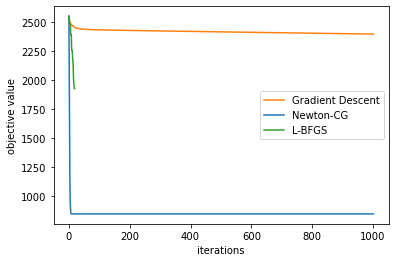

In [42]:
# objective value vs. iterations
plt.figure(1)
plt.plot(range(len(object1)),object1,c='tab:orange',label='Gradient Descent')
plt.plot(range(len(object2)),object2,c='tab:blue',label='Newton-CG')
plt.plot(range(len(object3)),object3,c='tab:green',label='L-BFGS')
plt.legend()
plt.xlabel('iterations')
plt.ylabel('objective value')

Text(0, 0.5, 'gradient norm')

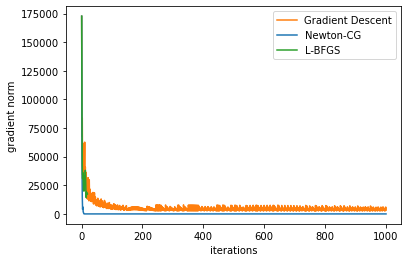

In [41]:
# gradient norm vs. iterations
plt.figure(2)
plt.plot(range(len(gradient1)),gradient1,c='tab:orange',label='Gradient Descent')
plt.plot(range(len(gradient2)),gradient2,c='tab:blue',label='Newton-CG')
plt.plot(range(len(gradient3)),gradient3,c='tab:green',label='L-BFGS')
plt.legend()
plt.xlabel('iterations')
plt.ylabel('gradient norm')

Text(0, 0.5, 'accuracy')

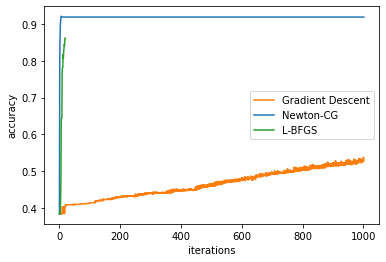

In [33]:
# accuracy vs. iterations
plt.figure(3)
plt.plot(range(len(accuracy1)),accuracy1,c='tab:orange',label='Gradient Descent')
plt.plot(range(len(accuracy2)),accuracy2,c='tab:blue',label='Newton-CG')
plt.plot(range(len(accuracy3)),accuracy3,c='tab:green',label='L-BFGS')
plt.legend()
plt.xlabel('iterations')
plt.ylabel('accuracy')

Text(0, 0.5, 'objective value')

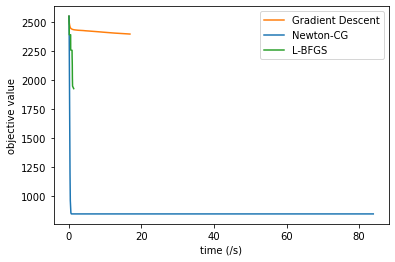

In [38]:
# objective value vs. time
plt.figure(4)
plt.plot(time1,object1,c='tab:orange',label='Gradient Descent')
plt.plot(time2,object2,c='tab:blue',label='Newton-CG')
plt.plot(time3,object3[:-1],c='tab:green',label='L-BFGS')
plt.legend()
plt.xlabel('time (/s)')
plt.ylabel('objective value')

Text(0, 0.5, 'gradient norm')

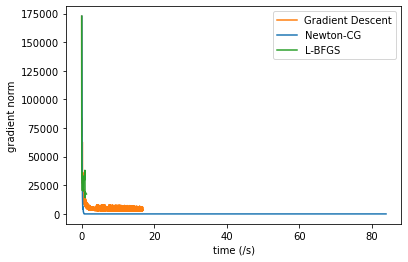

In [39]:
# gradient norm vs. time
plt.figure(5)
plt.plot(time1,gradient1,c='tab:orange',label='Gradient Descent')
plt.plot(time2,gradient2,c='tab:blue',label='Newton-CG')
plt.plot(time3,gradient3[:-1],c='tab:green',label='L-BFGS')
plt.legend()
plt.xlabel('time (/s)')
plt.ylabel('gradient norm')

Text(0, 0.5, 'accuracy')

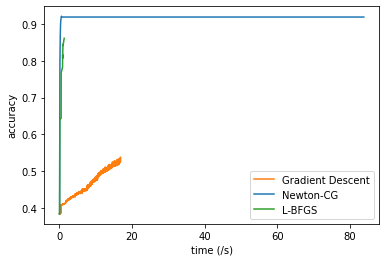

In [40]:
# accuracy vs. time
plt.figure(6)
plt.plot(time1,accuracy1,c='tab:orange',label='Gradient Descent')
plt.plot(time2,accuracy2,c='tab:blue',label='Newton-CG')
plt.plot(time3,accuracy3[:-1],c='tab:green',label='L-BFGS')
plt.legend()
plt.xlabel('time (/s)')
plt.ylabel('accuracy')